# Load Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load DataSet

In [2]:
df=pd.read_excel('Loan_risk.xlsx')

In [3]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


In [4]:
df.shape

(8995, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [6]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


# Data Preprocessing

# Check null values

In [7]:
df.isna().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

# outlier Handling

In [8]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
df1 = df[(z < 3).all(axis=1)]

In [9]:
df1.shape

(8375, 7)

# Data Exploration

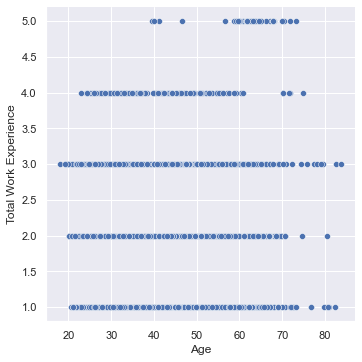

In [10]:
sns.set()
sns.relplot(df['Age'],df['Total Work Experience'])

In [11]:
df1.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000,8375.000000
mean,38.554886,2.116299,4.292657,0.809578,757.191881,0.205373,0.844060
std,9.876789,0.871676,1.265067,0.253957,59.609331,0.492208,1.662765
min,18.100000,1.000000,1.000000,0.008466,550.000000,0.000000,0.000000
25%,30.700000,1.000000,3.000000,0.660929,732.000000,0.000000,0.000000
50%,37.100000,2.000000,4.000000,0.800000,769.000000,0.000000,0.000000
75%,45.185000,3.000000,5.000000,0.926628,798.000000,0.000000,1.000000
max,69.330000,4.000000,6.000000,2.268788,882.000000,3.000000,8.000000


count    8375.000000
mean       38.554886
std         9.876789
min        18.100000
25%        30.700000
50%        37.100000
75%        45.185000
max        69.330000
Name: Age, dtype: float64

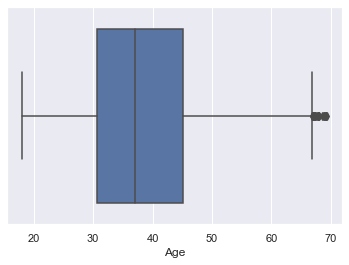

In [12]:
sns.boxplot(df1['Age'])
df1['Age'].describe()

count    8375.000000
mean      757.191881
std        59.609331
min       550.000000
25%       732.000000
50%       769.000000
75%       798.000000
max       882.000000
Name: Cibil score, dtype: float64

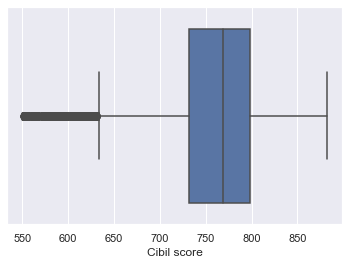

In [13]:
sns.boxplot(df1['Cibil score'])
df1['Cibil score'].describe()

# Get features and Target variable

In [14]:
x=df1.drop('Total bounces past12months',axis=1)
y=df1['Total bounces past12months']

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

# Split Data into Train Test

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5862, 6), (2513, 6), (5862,), (2513,))

# Apply algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
score=knn.score(x_test,y_test)
print(score)

0.7031436530043772


In [20]:
y_pred=knn.predict(x_test)

# ModelEvaluation

In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.809     0.974     0.884      1710
           1      0.267     0.224     0.244       335
           2      0.132     0.045     0.067       156
           3      0.068     0.034     0.045        88
           4      0.129     0.074     0.094        54
           5      0.077     0.019     0.030        54
           6      0.286     0.087     0.133        46
           7      0.300     0.079     0.125        38
           8      0.500     0.125     0.200        32

    accuracy                          0.703      2513
   macro avg      0.285     0.185     0.202      2513
weighted avg      0.617     0.703     0.649      2513



In [22]:
confusion_matrix(y_test,y_pred)

array([[1666,   36,    4,    1,    2,    0,    0,    1,    0],
       [ 220,   75,   17,   12,    4,    3,    1,    1,    2],
       [  73,   57,    7,    7,    8,    1,    1,    2,    0],
       [  41,   34,    7,    3,    0,    0,    1,    2,    0],
       [  13,   21,    6,    6,    4,    0,    2,    1,    1],
       [  16,   24,    2,    6,    3,    1,    1,    0,    1],
       [  17,   13,    6,    2,    1,    3,    4,    0,    0],
       [   8,   14,    1,    4,    2,    3,    3,    3,    0],
       [   5,    7,    3,    3,    7,    2,    1,    0,    4]],
      dtype=int64)

# Save model

In [23]:
import pickle
file=open('Loan_appliant_risk.pkl','wb')
pickle.dump(knn,file)